# 0.0. Imports

In [40]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib import pyplot          as plt
from sklearn    import preprocessing   as pp
from sklearn    import model_selection as ms

## 0.1. Loading Dataset

In [2]:
df_raw = pd.read_csv('../data/raw/train.csv')

In [3]:
df_raw.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# 1.0. Data Description

In [4]:
df1 = df_raw.copy()

In [5]:
cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code','previously_insured', 'vehicle_age',
            'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage', 'response']
df1.columns = cols_new

## 1.1. Data Dimension

In [6]:
print('number of rows {}'.format(df1.shape[0]))
print('number of columns {}'.format(df1.shape[1]))

number of rows 381109
number of columns 12


## 1.2. Data Types

In [7]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3. Check NA

In [8]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4. Data Descriptive

In [9]:
num_attributes = df1.select_dtypes(include = ["int64", "float64"])
cat_attributes = df1.select_dtypes(exclude = ["int64", "float64"])

In [10]:
# Central tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame( num_attributes.apply( np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std )).T
d2 = pd.DataFrame( num_attributes.apply( np.min )).T
d3 = pd.DataFrame( num_attributes.apply( np.max )).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

# Concatened
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ["Categorical", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]
m

,Categorical,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0. Feature Engineering

In [11]:
df2 = df1.copy()

In [12]:
df2.head()


,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [13]:
# vehicle_age
df2["vehicle_age"] = df2["vehicle_age"].apply( lambda x: "over-2-years" if x == "> 2 Years" else "bitween_1_2_years" if x=="1-2 Year" else "below_1_year")

# vehicle_damage
df2["vehicle_damage"] = df2["vehicle_age"].apply( lambda x: 0 if x == "Yes" else 1)

# 3.0. Data Filtering

In [14]:
df3 = df2.copy()

# 4.0. EDA

In [15]:
df4 = df3.copy()

## 4.1. Univariate Analysis

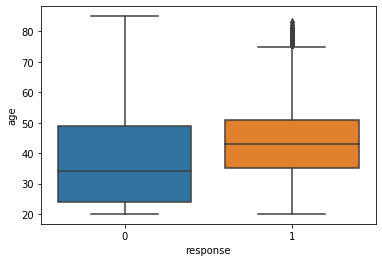

In [16]:
# 'age'
sns.boxplot(x="response", y="age", data=df4)

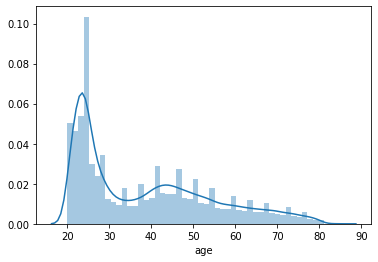

In [17]:
aux00 = df4.loc[df4["response"]== 0 , "age"]
sns.distplot(aux00)

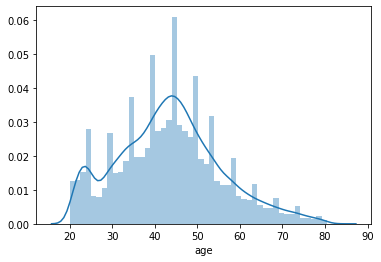

In [18]:
aux00 = df4.loc[df4["response"]== 1 , "age"]
sns.distplot(aux00)

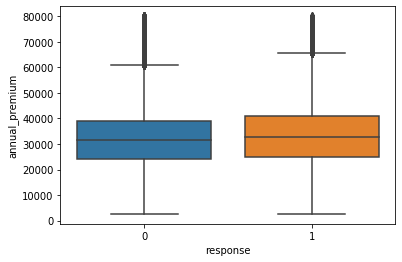

In [19]:
# 'annual_premium'
# sns.boxplot(x="response", y="annual_premium", data=df4)

aux = df4[df4["annual_premium"] < 80000 ]
sns.boxplot(x="response", y="annual_premium", data=aux)


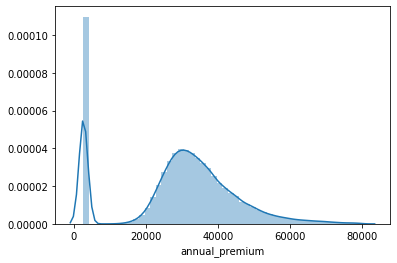

In [20]:
aux00 = aux.loc[aux["response"]== 0 , "annual_premium"]
sns.distplot(aux00)

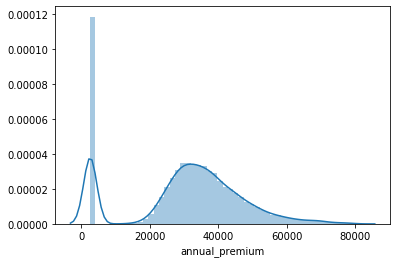

In [21]:
aux00 = aux.loc[aux["response"] == 1 , "annual_premium"]
sns.distplot(aux00)

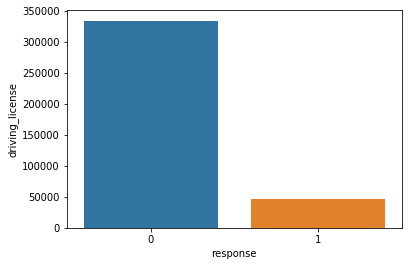

In [22]:
# 'driving_license'
aux = df4[["driving_license", "response"]].groupby("response").sum().reset_index()
sns.barplot(data=aux, x="response", y="driving_license")

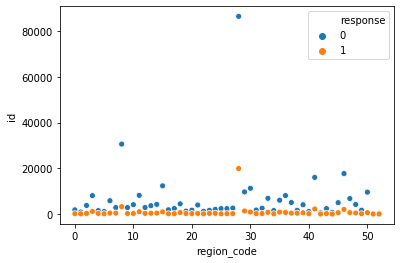

In [23]:
# 'region_code'
aux0 = df4[["id", "region_code", "response"]].groupby(["region_code", "response"]).count().reset_index()
aux0.head()
sns.scatterplot(data=aux0, hue="response", x="region_code", y="id")

In [24]:
# 'previously_insured'
# df4[["previously_insured", "response"]].head()
# pd.crosstab(df4["previously_insured"], df4["response"])
pd.crosstab(df4["previously_insured"], df4["response"]).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [25]:
# 'vehicle_age'
df4[["id", "vehicle_age", "response"]].groupby(["vehicle_age", "response"]).count().reset_index()

,vehicle_age,response,id
0,below_1_year,0,157584
1,below_1_year,1,7202
2,bitween_1_2_years,0,165510
3,bitween_1_2_years,1,34806
4,over-2-years,0,11305
5,over-2-years,1,4702


In [26]:
# 'vehicle_damage'

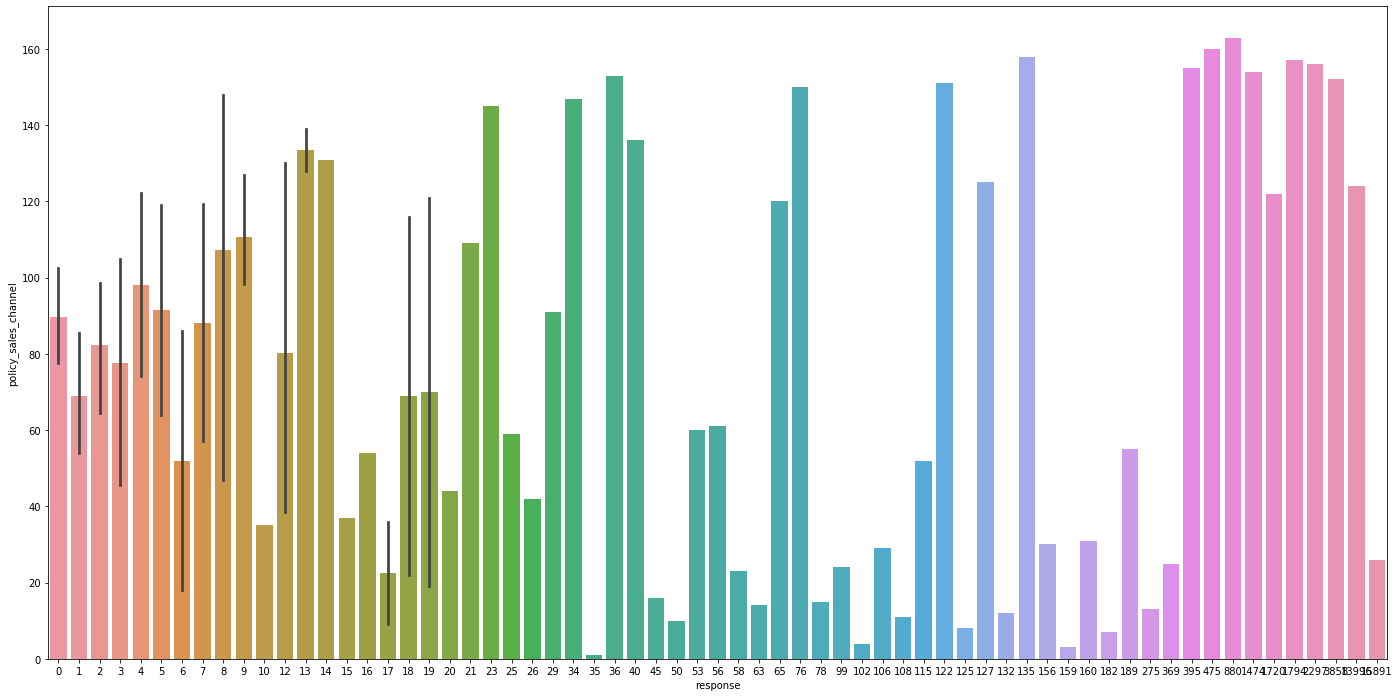

In [27]:
# 'policy_sales_channel'
plt.figure( figsize=(24, 12))
aux = df4[["policy_sales_channel", "response"]].groupby("policy_sales_channel").sum().reset_index()
sns.barplot(x="response", y="policy_sales_channel", data=aux)

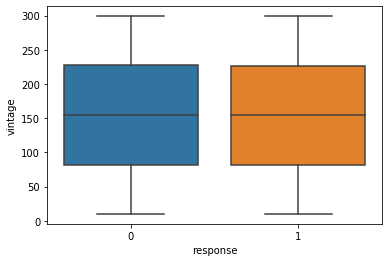

In [28]:
# 'vintage'
sns.boxplot(x="response", y="vintage", data=df4)

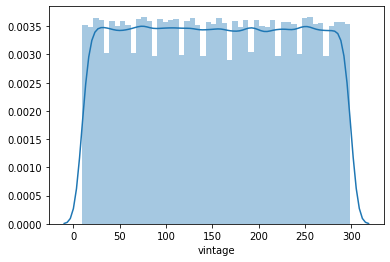

In [29]:
aux00 = df4.loc[df4["response"]== 0 , "vintage"]
sns.distplot(aux00)

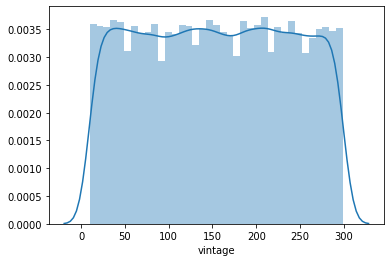

In [30]:
aux00 = df4.loc[df4["response"]== 1 , "vintage"]
sns.distplot(aux00)

# 5.0. Data Preparation

In [45]:
df5 = df4.copy()

In [48]:
X = df4.drop( "response", axis = 1 )
y = df4[ "response" ].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

In [49]:
df5.columns


Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## Standardization

In [50]:
ss = pp.StandardScaler()

# annual_premium
df5["annual_premium"] = ss.fit_transform( df5[["annual_premium"]].values)


In [51]:
#df5[["annual_premium"]].values

## Rescaling

In [52]:
nms_age = pp.MinMaxScaler()
nms_vintage = pp.MinMaxScaler()

# age
df5["age"] = nms_age.fit_transform( df5[["age"]].values )

# vintage
df5["vintage"] = nms_age.fit_transform( df5[["vintage"]].values )

## Encoder

In [36]:
# driving_license 

# vehicle_damage

In [37]:
# region_code - Frequency Encoding / Target Encoding / Weighted Target Encoding
target_encode_region_code = df5.groupby("region_code")["response"].mean()
df5.loc[:,"region_code"] = df5["region_code"].map(target_encode_region_code)

# vehicle_age - One Hot / Order Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix="vehicle_age", columns=["vehicle_age"])

# policy_sales_channel - Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby("policy_sales_channel").size() / len( df5 )
df5.loc[:,"policy_sales_channel"] = df5["policy_sales_channel"].map(fe_policy_sales_channel )

## 5.4. Validation Preparation

## 6.2. Features Importancia

# 7.0. Machine Learning

## 7.1. KNN

## 7.2. Extra Trees

# 8.0. Model Performance 